<div style="text-align: center;">
    <h1>Predict_House_Pricing_Regression</h1>
</div>


### A regression analysis is being conducted with a dataset containing house features. This analysis aims to predict house sale prices based on certain house characteristics. The model uses various house features as independent variables to predict the dependent variable, which is the sale price. As a result, this regression model provides valuable predictions that can be used to develop pricing strategies in the real estate market.

In [1]:
import pandas as pd # Data dosyalarini okuma paketi
pd.set_option("display.max_columns",100)
pd.set_option("display.max_rows",100)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('train.csv')

In [3]:
df1=pd.read_csv('test.csv')

In [4]:
df.shape

(1460, 81)

In [5]:
df1.shape

(1459, 80)

In [6]:
df=pd.concat([df,df1])

## EDA (Exploratory Data Analysis)

In [7]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [8]:
df.shape

(2919, 81)

In [9]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [10]:
df['MSZoning'].value_counts()

MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64

In [11]:
df['MSZoning'].mode()[0]

'RL'

In [12]:
abs(df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False))

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2       0.011378
BsmtHalfBath     0.016844
MiscVal          0.021190
Id               0.021917
LowQualFinSF     0.025606
YrSold           0.028923
OverallCond      0.077856
MSSubClass       0.084284
EnclosedPorch    0.128578
KitchenAbvGr     0.135907
Name: SalePr

In [13]:
x=df[['OverallQual','GrLivArea','GarageCars','TotalBsmtSF','1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt',
      'YearRemodAdd','GarageYrBlt','MasVnrArea','Fireplaces','BsmtFinSF1','LotFrontage','WoodDeckSF','2ndFlrSF',
      'OpenPorchSF','HalfBath','LotArea','BsmtFullBath','BsmtUnfSF']]

In [14]:
y=df[['SalePrice']]

In [15]:
x.isnull().sum()

OverallQual       0
GrLivArea         0
GarageCars        1
TotalBsmtSF       1
1stFlrSF          0
FullBath          0
TotRmsAbvGrd      0
YearBuilt         0
YearRemodAdd      0
GarageYrBlt     159
MasVnrArea       23
Fireplaces        0
BsmtFinSF1        1
LotFrontage     486
WoodDeckSF        0
2ndFlrSF          0
OpenPorchSF       0
HalfBath          0
LotArea           0
BsmtFullBath      2
BsmtUnfSF         1
dtype: int64

In [16]:
x.describe()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF
count,2919.000000,2919.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2896.000000,2919.000000,2918.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2918.000000
mean,6.089072,1500.759849,1.766621,1051.777587,1159.581706,1.568003,6.451524,1971.312778,1984.264474,1978.113406,102.201312,0.597122,441.423235,69.305795,93.709832,336.483727,47.486811,0.380267,10168.114080,0.429894,560.772104
std,1.409947,506.051045,0.761624,440.766258,392.362079,0.552969,1.569379,30.291442,20.894344,25.574285,179.334253,0.646129,455.610826,23.344905,126.526589,428.701456,67.575493,0.502872,7886.996359,0.524736,439.543659
min,1.000000,334.000000,0.000000,0.000000,334.000000,0.000000,2.000000,1872.000000,1950.000000,1895.000000,0.000000,0.000000,0.000000,21.000000,0.000000,0.000000,0.000000,0.000000,1300.000000,0.000000,0.000000
25%,5.000000,1126.000000,1.000000,793.000000,876.000000,1.000000,5.000000,1953.500000,1965.000000,1960.000000,0.000000,0.000000,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,7478.000000,0.000000,220.000000
50%,6.000000,1444.000000,2.000000,989.500000,1082.000000,2.000000,6.000000,1973.000000,1993.000000,1979.000000,0.000000,1.000000,368.500000,68.000000,0.000000,0.000000,26.000000,0.000000,9453.000000,0.000000,467.000000
75%,7.000000,1743.500000,2.000000,1302.000000,1387.500000,2.000000,7.000000,2001.000000,2004.000000,2002.000000,164.000000,1.000000,733.000000,80.000000,168.000000,704.000000,70.000000,1.000000,11570.000000,1.000000,805.500000
max,10.000000,5642.000000,5.000000,6110.000000,5095.000000,4.000000,15.000000,2010.000000,2010.000000,2207.000000,1600.000000,4.000000,5644.000000,313.000000,1424.000000,2065.000000,742.000000,2.000000,215245.000000,3.000000,2336.000000


For records where garage and basement values are NaN, it is assumed that these features do not exist, and the NaN values have been filled with 0.

In [17]:
x['GarageCars']=x['GarageCars'].fillna(0)

In [18]:
x['TotalBsmtSF']=x['TotalBsmtSF'].fillna(0)

In [19]:
x['GarageYrBlt']=x['GarageYrBlt'].fillna(0)

In [20]:
x['MasVnrArea']=x['MasVnrArea'].fillna(0)

In [21]:
x['BsmtFinSF1']=x['BsmtFinSF1'].fillna(0)

In [22]:
x['LotFrontage']=x['LotFrontage'].fillna(21)

In [23]:
x['BsmtFullBath']=x['BsmtFullBath'].fillna(0)

In [24]:
x['BsmtUnfSF']=x['BsmtUnfSF'].fillna(0)

In [25]:
x.isnull().sum()

OverallQual     0
GrLivArea       0
GarageCars      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
GarageYrBlt     0
MasVnrArea      0
Fireplaces      0
BsmtFinSF1      0
LotFrontage     0
WoodDeckSF      0
2ndFlrSF        0
OpenPorchSF     0
HalfBath        0
LotArea         0
BsmtFullBath    0
BsmtUnfSF       0
dtype: int64

In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [27]:
x1=x[:1460]

In [28]:
x1.shape

(1460, 21)

In [29]:
y1=y[:1460]

In [30]:
test=x[1460:]

In [31]:
test.shape

(1459, 21)

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

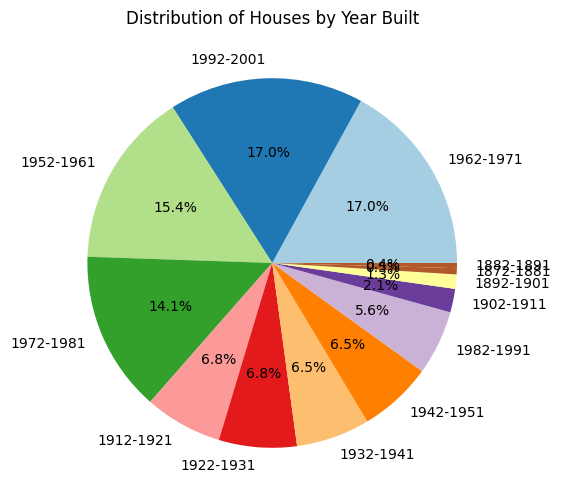

In [33]:
x2=pd.DataFrame()
# Yıl bilgilerini almak
min_year = x1['YearBuilt'].min()
max_year = x1['YearBuilt'].max()

# Yıl aralıklarını belirleme
bins = list(range(min_year, max_year + 1, 10))  # 10 yıllık aralıklar
labels = [f'{i}-{i + 9}' for i in bins[:-1]]  # Aralık etiketleri

# Yıl aralıklarına ayırma
x2['YearBuiltGroup'] = pd.cut(x1['YearBuilt'], bins=bins, labels=labels, right=False)

# Pasta grafiği için veri hazırlama
year_counts = x2['YearBuiltGroup'].value_counts()

# Pasta grafiği ile görselleştirme
plt.figure(figsize=(10, 6))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(year_counts))))
plt.title('Distribution of Houses by Year Built')
plt.show()

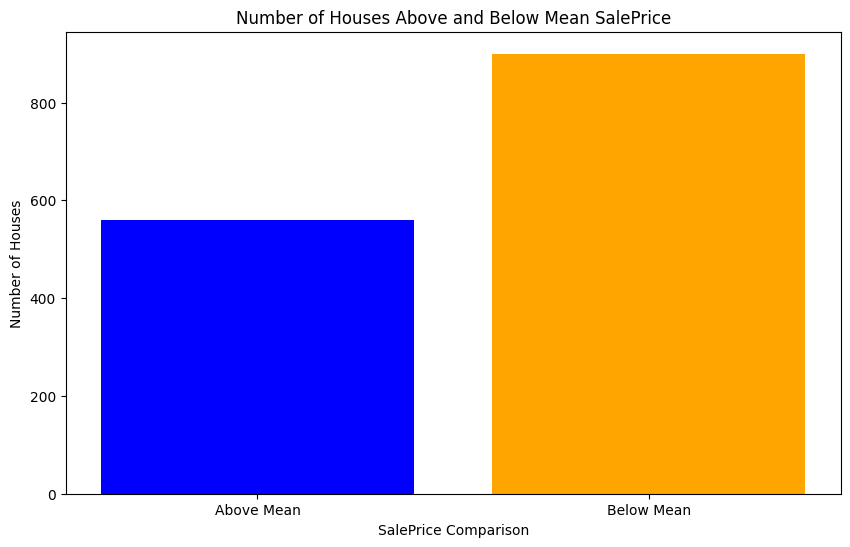

In [34]:
# SalePrice'ın ortalamasını hesaplama
mean_sale_price = y1['SalePrice'].mean()

# SalePrice ortalamasının üstünde ve altında olan veri sayısını belirleme
above_mean = y1[y1['SalePrice'] > mean_sale_price].shape[0]
below_mean = y1[y1['SalePrice'] <= mean_sale_price].shape[0]

# Sonuçları bar chart ile görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(['Above Mean', 'Below Mean'], [above_mean, below_mean], color=['blue', 'orange'])
plt.xlabel('SalePrice Comparison')
plt.ylabel('Number of Houses')
plt.title('Number of Houses Above and Below Mean SalePrice')
plt.show()

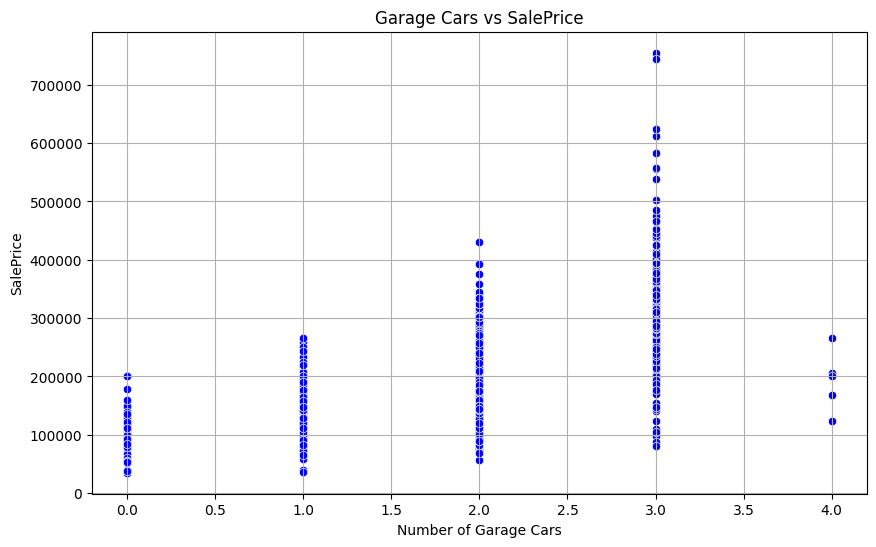

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=x1['GarageCars'], y=y1['SalePrice'], marker='o', color='b')
plt.xlabel('Number of Garage Cars')
plt.ylabel('SalePrice')
plt.title('Garage Cars vs SalePrice')
plt.grid(True)
plt.show()

## Modelling

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.20,random_state=42)

In [37]:
l=LinearRegression()

In [38]:
model=l.fit(x_train,y_train)

In [39]:
predict=model.predict(x_test)

In [40]:
mean_squared_error(y_test,predict)**.5

37779.53997606789

In [41]:
r2_score(y_test,predict)

0.8139200860237297

In [42]:
r=RandomForestRegressor()

In [43]:
model1=r.fit(x_train,y_train)

In [44]:
predict1=model1.predict(x_test)

In [45]:
mean_squared_error(y_test,predict1)**.5

29659.08118032844

In [46]:
r2_score(y_test,predict1)

0.8853163382233904

In [47]:
g=GradientBoostingRegressor()

In [48]:
model2=g.fit(x_train,y_train)

In [49]:
predict2=model2.predict(x_test)

In [50]:
mean_squared_error(y_test,predict2)**.5

28232.44854872888

In [51]:
r2_score(y_test,predict2)

0.896083800150538

In [52]:
predict3=model2.predict(test)

In [53]:
test['SalePrice']=predict3

In [54]:
test.head()

,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,GarageYrBlt,MasVnrArea,Fireplaces,BsmtFinSF1,LotFrontage,WoodDeckSF,2ndFlrSF,OpenPorchSF,HalfBath,LotArea,BsmtFullBath,BsmtUnfSF,SalePrice
0,5,896,1.0,882.0,896,1,5,1961,1961,1961.0,0.0,0,468.0,80.0,140,0,0,0,11622,0.0,270.0,123858.932055
1,6,1329,1.0,1329.0,1329,1,6,1958,1958,1958.0,108.0,0,923.0,81.0,393,0,36,1,14267,0.0,406.0,160448.548984
2,5,1629,2.0,928.0,928,2,6,1997,1998,1997.0,0.0,1,791.0,74.0,212,701,34,1,13830,0.0,137.0,173652.055217
3,6,1604,2.0,926.0,926,2,7,1998,1998,1998.0,20.0,1,602.0,78.0,360,678,36,1,9978,0.0,324.0,183902.255568
4,8,1280,2.0,1280.0,1280,2,5,1992,1992,1992.0,0.0,0,263.0,43.0,0,0,82,0,5005,0.0,1017.0,203009.360771


### Result: The model developed using GradientBoostingRegressor can predict house sale values with an accuracy rate of 89.6%.

Graphs plotted for the training data were also created for the SalePrice column predicted from the test data. By comparing these graphs, the prediction accuracy was measured.

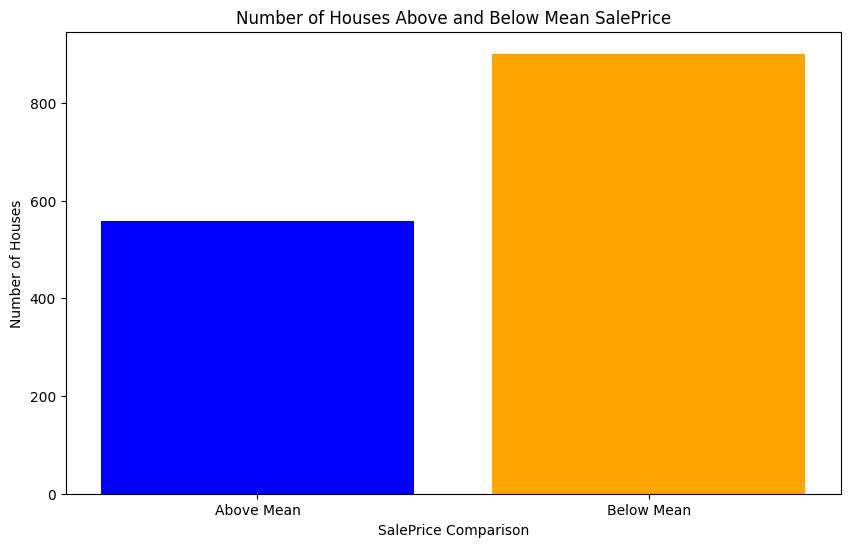

In [55]:
# SalePrice'ın ortalamasını hesaplama
mean_sale_price = df['SalePrice'].mean()

# SalePrice ortalamasının üstünde ve altında olan veri sayısını belirleme
above_mean = test[test['SalePrice'] > mean_sale_price].shape[0]
below_mean = test[test['SalePrice'] <= mean_sale_price].shape[0]

# Sonuçları bar chart ile görselleştirme
plt.figure(figsize=(10, 6))
plt.bar(['Above Mean', 'Below Mean'], [above_mean, below_mean], color=['blue', 'orange'])
plt.xlabel('SalePrice Comparison')
plt.ylabel('Number of Houses')
plt.title('Number of Houses Above and Below Mean SalePrice')
plt.show()

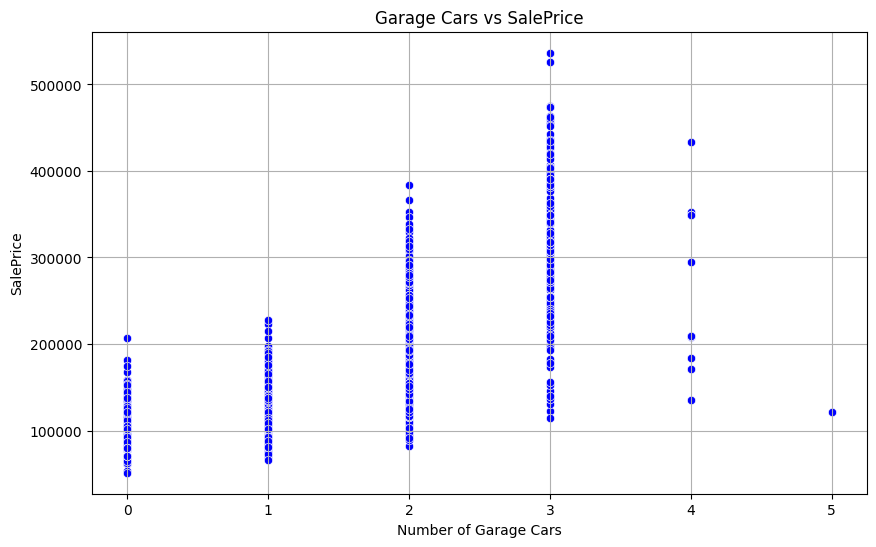

In [56]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test['GarageCars'], y=test['SalePrice'], marker='o', color='b')
plt.xlabel('Number of Garage Cars')
plt.ylabel('SalePrice')
plt.title('Garage Cars vs SalePrice')
plt.grid(True)
plt.show()